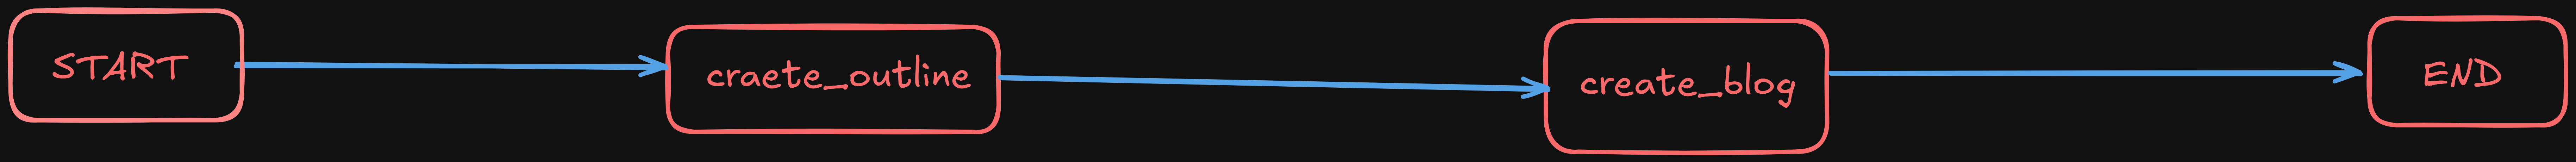

# <b>step by step

step1:- importing librarires

In [1]:
from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI

model = ChatGoogleGenerativeAI(model="gemini-2.5-pro")

In [2]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

step2:-creating state

In [3]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str

step3:-initializing the graph

In [5]:
graph=StateGraph(BlogState)

step4:-adding nodes to your graph

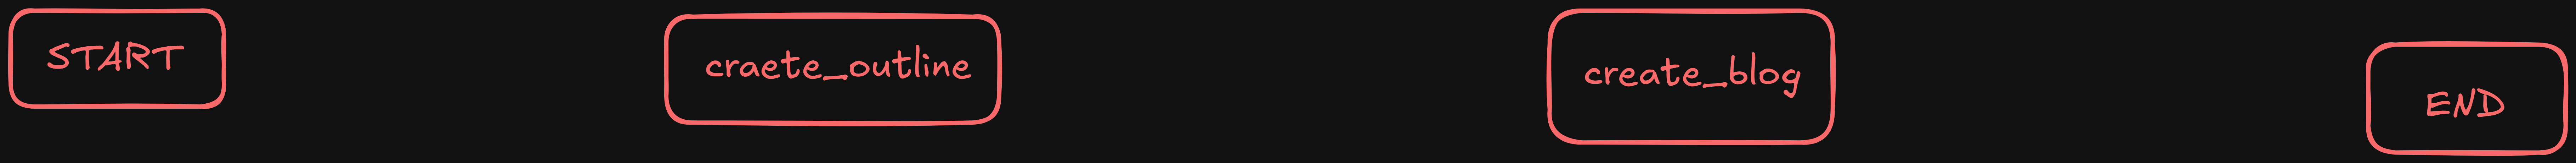

In [6]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [7]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [8]:
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)


step5:-adding edges

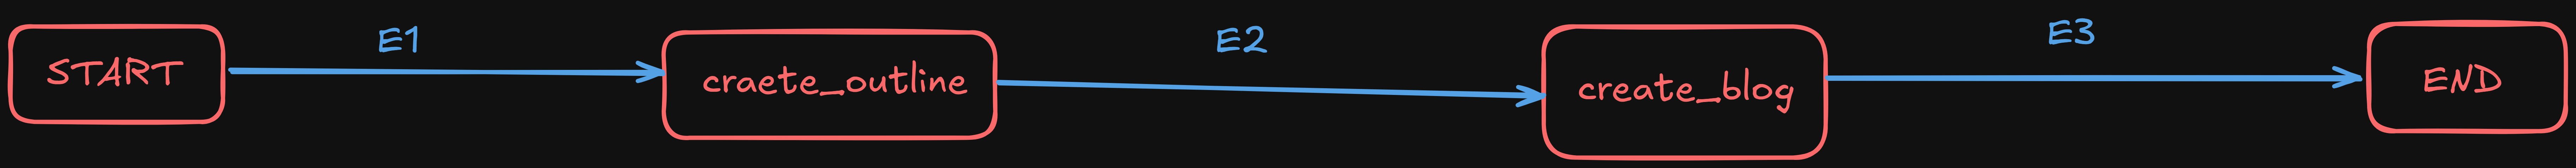

In [9]:
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)


step6:-compiling the graph

In [10]:
workflow = graph.compile()

step7:-executing the graph

In [11]:
intial_state = {'title': 'Rise of AI in India'}


In [ ]:
final_state = workflow.invoke(intial_state)
print(final_state)


In [ ]:
print(final_state['outline'])